In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XJElia14KZk73QdrV7m4")
project = rf.workspace("noctor-workspace").project("markers-39r7m")
version = project.version(3)
dataset = version.download("tensorflow")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Markers-3 in tensorflow:: 100%|██████████| 3918/3918 [00:00<00:00, 9820.27it/s]


In [3]:
data = pd.read_csv('Markers-3/train/_annotations.csv')
data_v = pd.read_csv('Markers-3/valid/_annotations.csv')
data_t = pd.read_csv('Markers-3/test/_annotations.csv')
print(data.shape)
print(data_v.shape)
print(data_t.shape)

(3476, 8)
(325, 8)
(109, 8)


In [ ]:
del data, data_t, data_v

In [4]:
data.head(5)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,img2102_jpg.rf.d04c03c4e911e9916e8264064ee175d...,320,180,eraser,14,25,111,180
1,img340_jpg.rf.d020452ba379af6a35c75e378e62b710...,320,180,blue marker,145,77,204,133
2,img1857_jpg.rf.cfc1be88fa10c1bdb87f6664b53cd5e...,320,180,eraser,119,13,198,140
3,img1620_jpg.rf.d10c182ed09c79a130b4ba33a2c21d0...,320,180,black marker,75,92,207,116
4,img2060_jpg.rf.cfee1216345a9b63c2d3d65d252624b...,320,180,eraser,241,5,320,165


In [ ]:
data['class'].unique()

array(['blue marker', 'black marker', 'eraser', 'red marker'],
      dtype=object)

In [5]:
gender_dic = {'eraser': 0, 'blue marker': 1, 'red marker': 2, 'black marker': 3}
data['class'] = data['class'].map(gender_dic)
data_v['class'] = data_v['class'].map(gender_dic)
data_t['class'] = data_t['class'].map(gender_dic)

In [ ]:
data.head(5)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,img1530_jpg.rf.66489018c0fa96e576b0e4882369aa6...,640,360,3,381,31,640,333
1,img758_jpg.rf.65007ea37fc36efc35de805420650b09...,640,360,2,269,110,373,237
2,img469_jpg.rf.64fff7c8588fa7dec9cd8a7da83dbd21...,640,360,1,568,87,630,344
3,img2038_jpg.rf.64c8425e93741bb48335604515a1b9e...,640,360,0,195,67,435,326
4,img511_jpg.rf.64d1bd10d4d63cdca214ba5311a4dec5...,640,360,1,0,109,231,360


In [ ]:
data_t.head(5)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,img1287_jpg.rf.0caaff00d9039df63fa3d27008c92b2...,640,360,3,241,89,368,258
1,img154_jpg.rf.169146c21e86b1a07ae35069aa5c19ff...,640,360,1,238,119,419,300
2,img193_jpg.rf.12f2df6e256bf65e2b3f80b088dcb60a...,640,360,1,187,137,423,274
3,img1956_jpg.rf.097947edaa7ee7b0f96b59afb71df70...,640,360,0,195,77,427,298
4,img274_jpg.rf.16c7b3dd6f83fa98a88d08d2c3d9c009...,640,360,1,280,98,399,184


In [ ]:
data_v.head(5)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,img268_jpg.rf.025350c8b4459aa7a01a8e183c11406a...,320,180,1,118,46,194,104
1,img458_jpg.rf.02b3f81139fd78d5098aad08011f00e3...,320,180,1,18,19,57,175
2,img1047_jpg.rf.03aa78622892ca2f29f6d8e9636faef...,320,180,2,8,26,46,180
3,img692_jpg.rf.037884992cd6e208573a8d637308d961...,320,180,2,103,61,204,129
4,img1939_jpg.rf.04ed0779b6e915e3a79f61739ffc600...,320,180,0,106,34,217,150


In [6]:
train = []
label_train = []
test = []
label_test = []
validation = []
label_validation = []

for i in range(0,3476):
  path1 = data.at[i,'filename']
  imr_t = cv2.imread(f'/content/Markers-3/train/{path1}')
  img_t = cv2.cvtColor(imr_t, cv2.COLOR_BGR2RGB)
  train.append(img_t)
  label_train.append(data.at[i,'class'])

for j in range(0,325):
  path3 = data_v.at[j,'filename']
  imrv = cv2.imread(f'/content/Markers-3/valid/{path3}')
  imgv = cv2.cvtColor(imrv, cv2.COLOR_BGR2RGB)
  validation.append(imgv)
  label_validation.append(data_v.at[j,'class'])

for k in range(0,109):
  path5 = data_t.at[k,'filename']
  imrt = cv2.imread(f'/content/Markers-3/test/{path5}')
  imgt = cv2.cvtColor(imrt, cv2.COLOR_BGR2RGB)
  test.append(imgt)
  label_test.append(data_t.at[k,'class'])

In [ ]:
del train, test, validation, label_train, label_test, label_validation

1


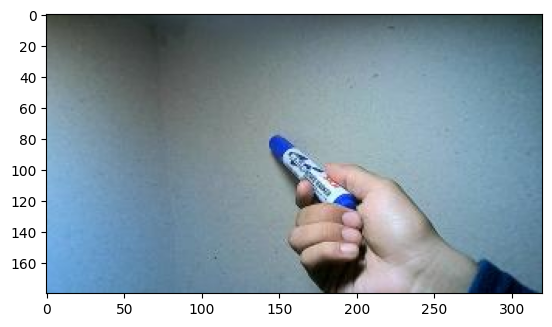

In [7]:
plt.imshow(train[1])
print(label_train[1])

In [8]:
train[1].shape

(180, 320, 3)

In [68]:
sizem = (180,320,3)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=sizem,activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(32,(3,3),input_shape=sizem,activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(4,activation='sigmoid')
])

In [67]:
del model

In [10]:
train = np.array(train, dtype='float32')
validation = np.array(validation, dtype='float32')
test = np.array(test, dtype='float32')
label_train = np.array(label_train)
label_validation = np.array(label_validation)
label_test = np.array(label_test)

In [11]:
train = train/255.
validation = validation/255.
test = test/255.

In [44]:
train[1]

array([[[0.24705882, 0.27058825, 0.22352941],
        [0.24705882, 0.27058825, 0.22352941],
        [0.2509804 , 0.27450982, 0.22745098],
        ...,
        [0.13725491, 0.22745098, 0.20392157],
        [0.13333334, 0.22352941, 0.2       ],
        [0.13333334, 0.22352941, 0.2       ]],

       [[0.25882354, 0.28235295, 0.23529412],
        [0.25882354, 0.28235295, 0.23529412],
        [0.2627451 , 0.28627452, 0.23921569],
        ...,
        [0.14117648, 0.23137255, 0.20784314],
        [0.13725491, 0.22745098, 0.20392157],
        [0.14117648, 0.23137255, 0.20784314]],

       [[0.27058825, 0.29411766, 0.24705882],
        [0.27450982, 0.29803923, 0.2509804 ],
        [0.27450982, 0.29803923, 0.2509804 ],
        ...,
        [0.14901961, 0.23529412, 0.22352941],
        [0.14509805, 0.23529412, 0.21176471],
        [0.14901961, 0.23921569, 0.21568628]],

       ...,

       [[0.4       , 0.64705884, 0.85882354],
        [0.39607844, 0.6431373 , 0.85490197],
        [0.39607844, 0

In [69]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train,label_train,epochs=15,validation_data=(validation,label_validation))

Epoch 1/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.3046 - loss: 1.4474 - val_accuracy: 0.4769 - val_loss: 1.1935
Epoch 2/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.5524 - loss: 1.0750 - val_accuracy: 0.8031 - val_loss: 0.6168
Epoch 3/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7302 - loss: 0.6700 - val_accuracy: 0.7600 - val_loss: 0.5046
Epoch 4/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8022 - loss: 0.4622 - val_accuracy: 0.8000 - val_loss: 0.3763
Epoch 5/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8143 - loss: 0.4294 - val_accuracy: 0.8523 - val_loss: 0.3360
Epoch 6/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8743 - loss: 0.3201 - val_accuracy: 0.9477 - val_loss: 0.2618
Epoch 7/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8885 - loss: 0.2969 - val_accuracy: 0.9631 - val_loss: 0.1973
Epoch 8/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9172 - loss: 0.2391 - val_accu

In [70]:
model.evaluate(test, label_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.9791 - loss: 0.0763


[0.07403520494699478, 0.9816513657569885]

In [71]:
modelc = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = modelc.convert()

open('model_v3.tflite', 'wb').write(tflite_model)

Saved artifact at '/tmp/tmp4ffjiacl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 320, 3), dtype=tf.float32, name='keras_tensor_138')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  139515553016896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139515553021472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139515551517152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139515551582864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139515551583568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139515551581984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139515551581632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139515551583744: TensorSpec(shape=(), dtype=tf.resource, name=None)


6893092